In [1]:
from UTILITY_quickstart import *

with open('setLattice_defaults.yml', 'r') as file:
    importedDefaultSettings = yaml.safe_load(file)

In [2]:
csrTF = True
evalElement = "MFFF"


inputBeamFilePathSuffix = importedDefaultSettings["inputBeamFilePathSuffix"]
tao = initializeTao(
    #inputBeamFilePathSuffix = '/beams/nmmToL0AFEND_2bunch_2024-02-16Clean/2024-02-16_2bunch_1e5Downsample_nudgeWeights.h5',
    inputBeamFilePathSuffix = inputBeamFilePathSuffix,
    
    csrTF = csrTF,
    numMacroParticles=1e4,
)

# #Set aside the initial beam for later reference
# trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
# PInit = ParticleGroup(data=tao.bunch_data("L0AFEND"))


#Rescale charge
# newCharge = 1e-9
# trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
# P = getBeamAtElement(tao, "L0AFEND")
# print(f"""\n\n\nAs imported charge: {P.charge}""")
# P.charge = newCharge
# makeBeamActiveBeamFile(P)
# tao.cmd('reinit beam')

#Set aside the initial beam for later reference
trackBeam(tao, trackEnd = "L0BFEND", verbose = True)
P = ParticleGroup(data=tao.bunch_data("L0AFEND"))

Environment set to:  /Users/nmajik/Documents/SLAC/FACET2-Bmad-PyTao
Tracking to end
CSR on
Overwriting lattice with setLattice() defaults
No defaults file provided to setLattice(). Using setLattice_defaults.yml
Number of macro particles = 10000.0
Loaded activeBeamFile.h5
Set track_start = L0AFEND, track_end = L0BFEND
Tracking!
trackBeam() exiting


In [3]:
def sortIndices(lst):
    #Returns the indices of the sorted elements, e.g. [1, 3, 5, 2, 4] --> [0, 3, 1, 4, 2]
    return [i for i, _ in sorted(enumerate(lst), key=lambda x: x[1])]

# Example usage
numbers = [1, 3, 5, 2, 4]
result = sortIndices(numbers)
print(result)  

[0, 3, 1, 4, 2]


In [4]:
# Example array
arr = np.array([1, 2, 3, 4, 5, 6, 7, 8])

# Split the array into n parts
n = 3
result = np.array_split(arr, n)

# Display the result
for i, subarray in enumerate(result):
    print(f"Subarray {i}: {subarray}")


Subarray 0: [1 2 3]
Subarray 1: [4 5 6]
Subarray 2: [7 8]


In [5]:
def sliceBeam(
    P,
    sortKey = None,
    numBeamlets = None
):
    """Sort a beam by sortKey, then split it into numBeamlets of equal count"""
    sortedIndices = sortIndices(P[sortKey])
    
    subsetIndices = np.array_split(sortedIndices, numBeamlets)
    
    resultBeamlets = []
    
    for activeSubsetIndices in subsetIndices:
        PMod = P.copy()
        
        # OpenPMD checks the length so I can't just remove the "killed" particles
        # Also, for compatibility, I don't want to change either the weight or status of the killed particles
        filtered_data = {
            "x": PMod.x[activeSubsetIndices],
            "y": PMod.y[activeSubsetIndices],
            "z": PMod.z[activeSubsetIndices],
            "px": PMod.px[activeSubsetIndices],
            "py": PMod.py[activeSubsetIndices],
            "pz": PMod.pz[activeSubsetIndices],
            "t": PMod.t[activeSubsetIndices], 
            "status": PMod.status[activeSubsetIndices], 
            "weight": PMod.weight[activeSubsetIndices], 
            "species": PMod.species
        }
        
        # Create a new ParticleGroup instance with the filtered data
        PMod = ParticleGroup(data=filtered_data)
        #print(f"New particle count: {len(PMod.x)}")
        #print(f"{len(PMod.x)}")
    
        resultBeamlets.append(PMod)

    return resultBeamlets



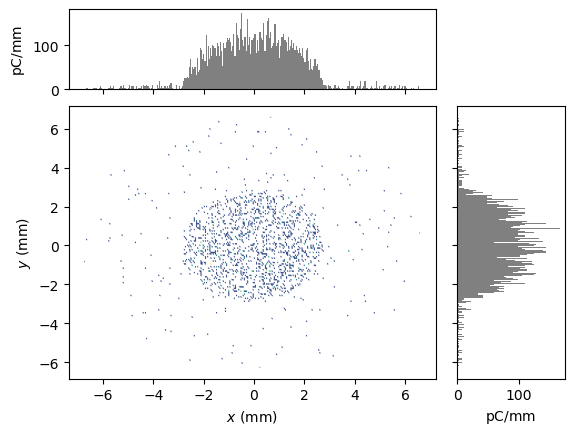

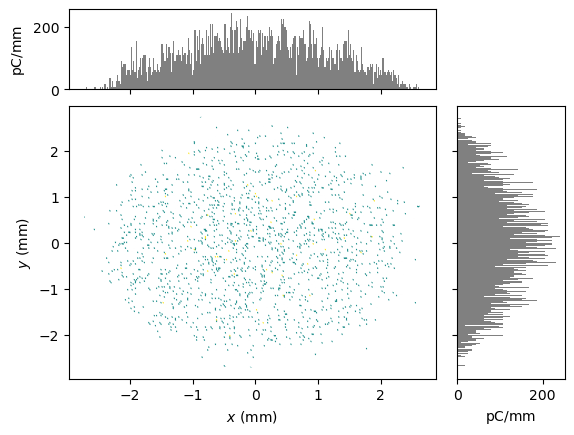

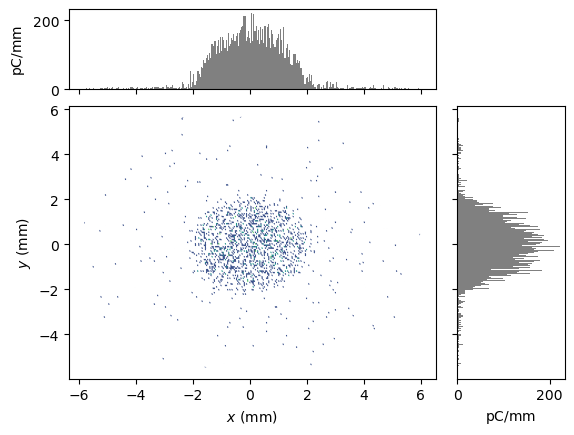

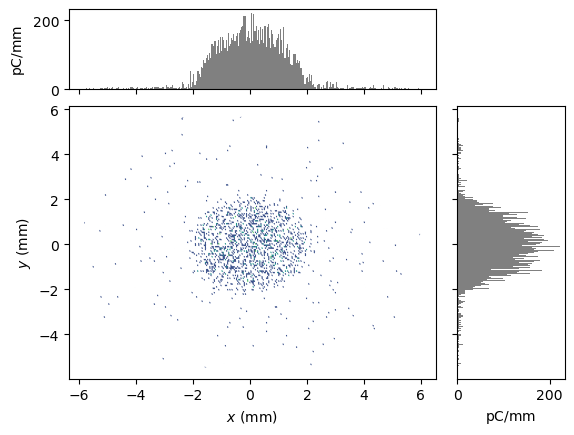

In [6]:
resultBeamlets = sliceBeam( P, sortKey = "pz", numBeamlets = 3 ) 
for activeBeam in resultBeamlets:
    display(plotMod(activeBeam, 'x', 'y',  bins=300))